In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nadia = cv2.imread('./nadia murad.jpg',0)
denis = cv2.imread('./denis mukwege.jpg',0)
solvay = cv2.imread('./solvay conference.jpg',0)

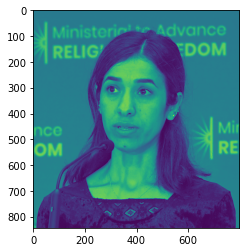

In [3]:
plt.imshow(nadia)

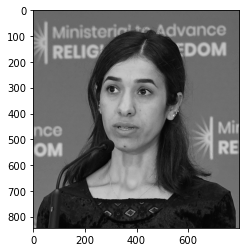

In [4]:
plt.imshow(nadia,cmap='gray')

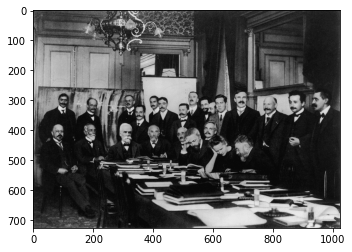

In [5]:
plt.imshow(solvay,cmap='gray')

In [6]:
# First we need classifier and pass in XML classifier 
# Luckily openCV comes with pre trained cascade files

face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

# it has around 6000 features to locate for a face so it will check all features in face and detects it

In [7]:
def detect_face(img):

    face_img = img.copy()

    face_rects = face_cascade.detectMultiScale(face_img)
  
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10)
  
    return face_img

In [8]:
result = detect_face(nadia)

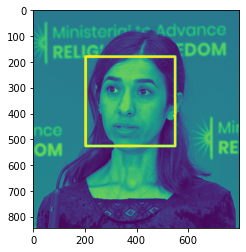

In [9]:
plt.imshow(result)

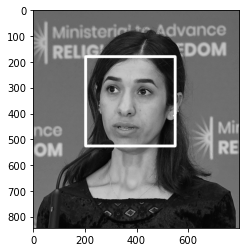

In [10]:
plt.imshow(result, cmap='gray')

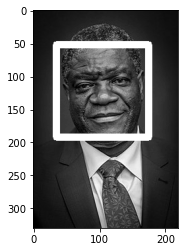

In [11]:
plt.imshow(detect_face(denis),cmap='gray')

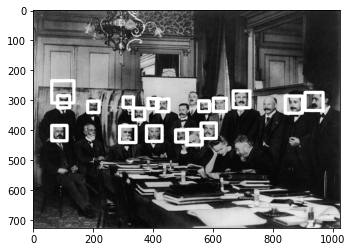

In [12]:
plt.imshow(detect_face(solvay),cmap='gray')

In [13]:
# for slovay we can see that it detects double faces at some places so we will edit detect face function

def adj_detect_face(img):

    face_img = img.copy()

    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)

    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10)

    return face_img

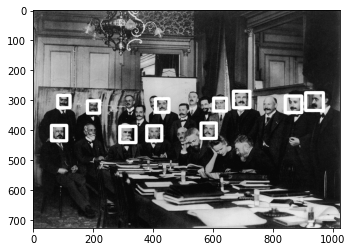

In [14]:
result = adj_detect_face(solvay)
plt.imshow(result,cmap='gray')

In [15]:
# now its more clear 
# keep in mind whenver you have img has multiple faces above xml file may not work very well

In [16]:
# eyes detection
eye_cascade = cv2.CascadeClassifier('./haarcascade_eye.xml')

In [17]:
def detect_eyes(img):

    face_img = img.copy()

    eyes_rects = eye_cascade.detectMultiScale(face_img)

    for (x,y,w,h) in eyes_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10)

    return face_img

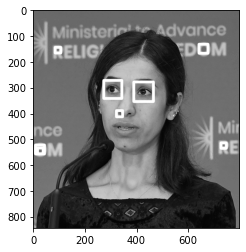

In [18]:
result = detect_eyes(nadia)
plt.imshow(result,cmap='gray')

In [19]:
# see it will also detecting nostril as eye so just adjust some hyperparameter

def detect_eyes(img):

    face_img = img.copy()

    eyes_rects = eye_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)

    for (x,y,w,h) in eyes_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10)

    return face_img

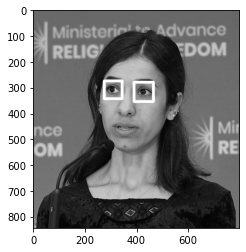

In [20]:
result = detect_eyes(nadia)
plt.imshow(result,cmap='gray')

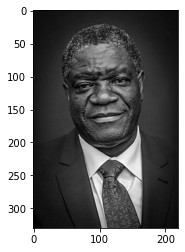

In [21]:
result = detect_eyes(denis)
plt.imshow(result,cmap='gray')

In [22]:
# for denis it will not detect eyes because cascade is confuse ti capture features as his skin and eye color matching 

In [23]:
# using webcam

In [24]:
cap = cv2.VideoCapture(0)

while True:

    ret,frame = cap.read(0)

    frame = detect_face(frame)

    cv2.imshow('Video Face Detect', frame)

    k = cv2.waitKey(1)

    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()